In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
sys.path.append("../src")

In [3]:
import torchChar
import json
import numpy as np
import matplotlib.pyplot as plt


In [25]:
list(torchChar.FontFamily)

[<FontFamily.Ming: 1>,
 <FontFamily.Kai: 2>,
 <FontFamily.Yen: 3>,
 <FontFamily.FangSong: 4>]

In [4]:
moe_json = torchChar.get_data_dir() / "dict-revised.json"

In [5]:
with open(moe_json, "r", encoding="UTF-8") as fin:
    moe = json.load(fin)

In [6]:
lexicon, n_homophone = torchChar.build_lexicon(moe)
print(len(lexicon), n_homophone)

11896 1717


In [7]:
[x for x in lexicon if x.title == "曾"]

[Character(title='曾', strokes=12, radical='曰', zhuyin='ㄗㄥ'),
 Character(title='曾', strokes=12, radical='曰', zhuyin='ㄘㄥˊ')]

In [18]:
examples = torchChar.build_examples(lexicon, torchChar.FontFamily.Ming)

In [20]:
import pandas as pd

In [26]:
dd =  pd.DataFrame.from_records(
    [(x.title, x.strokes, x.radical, x.zhuyin, x.font_family) for x in examples], 
    columns = ["title", "strokes", "radical", "zhuyin", "font_family"])

In [27]:
dd

,title,strokes,radical,zhuyin,font_family
0,一,1,一,ㄧ,Ming
1,丁,2,一,ㄉㄧㄥ,Ming
2,丁,2,一,ㄓㄥ,Ming
3,丂,2,一,ㄎㄠˇ,Ming
4,七,2,一,ㄑㄧ,Ming
...,...,...,...,...,...
11637,龠,17,龠,ㄩㄝˋ,Ming
11638,龢,22,龠,ㄏㄜˊ,Ming
11639,龤,26,龠,ㄒㄧㄝˊ,Ming
11640,𦌊,16,网,ㄙㄨˋ,Ming


In [33]:
examples[6559].title

'禦'

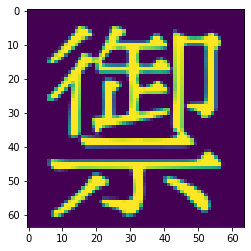

In [34]:
plt.imshow(examples[6559].bitmap)

In [40]:
import pickle
with (torchChar.get_data_dir() / "train_examples/char_examples_Yen.pkl").open("rb") as fin:
    yen = pickle.load(fin)
with (torchChar.get_data_dir() / "train_examples/char_examples_Ming.pkl").open("rb") as fin:
    ming = pickle.load(fin)
with (torchChar.get_data_dir() / "train_examples/char_examples_FangSong.pkl").open("rb") as fin:
    song = pickle.load(fin)
with (torchChar.get_data_dir() / "train_examples/char_examples_Kai.pkl").open("rb") as fin:
    kai = pickle.load(fin)


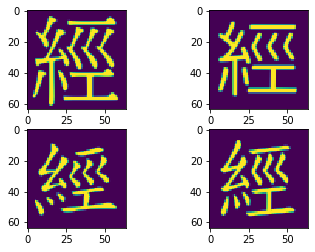

In [45]:
fig, ax = plt.subplots(2, 2)
def get_bitmap(data, char):
    return [x.bitmap for x in data if x.title==char][0]
ch = "經"
ax[0][0].imshow(get_bitmap(ming, ch))
ax[0][1].imshow(get_bitmap(yen, ch))
ax[1][0].imshow(get_bitmap(kai, ch))
ax[1][1].imshow(get_bitmap(song, ch))